In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# OD600

In [2]:
fa_culture = pd.read_csv('../data/culture_data/FA_culture.csv')
samples = ['Ps','Ss','Ls','Ps+Ss+Ls']
FA=list(fa_culture['FA'])*12; conc = list(fa_culture['concentration'])*12;
OD, sample=[],[]
for s in samples:
    OD+= list(fa_culture[s+'_1'])+list(fa_culture[s+'_2'])+list(fa_culture[s+'_3'])
    sample+=[s]*18
fa_data = pd.DataFrame(zip(FA,conc,OD,sample),columns=['FA','FA concentration(mM)','OD600','Sample'])

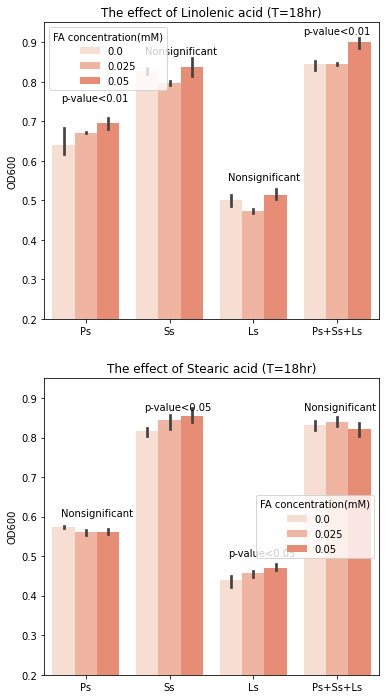

In [3]:
fig,axs=plt.subplots(2,1,figsize=(6,12))
sns.set_palette("Reds")
sns.barplot(data=fa_data[fa_data['FA']=='Linolenic acid'],x='Sample',y='OD600',hue='FA concentration(mM)',ax=axs[0])
sns.barplot(data=fa_data[fa_data['FA']=='Stearic acid'],x='Sample',y='OD600',hue='FA concentration(mM)',ax=axs[1])
axs[0].set_title('The effect of Linolenic acid (T=18hr)')
axs[1].set_title('The effect of Stearic acid (T=18hr)')
for ax in axs:
    ax.set_ylim([0.2,0.95])
    ax.set_xlabel('')
axs[0].text(-0.3,0.75,s='p-value<0.01')
axs[0].text(0.7,0.87,s='Nonsignificant')
axs[0].text(1.7,0.55,s='Nonsignificant')
axs[0].text(2.6,0.92,s='p-value<0.01')

axs[1].text(-0.3,0.6,s='Nonsignificant')
axs[1].text(0.7,0.87,s='p-value<0.05')
axs[1].text(1.7,0.5,s='p-value<0.05')
axs[1].text(2.6,0.87,s='Nonsignificant')
# plt.savefig('../../../../Oral_paper/Figures_2025/fa_validation.svg',format='svg',dpi=150)

In [3]:
coculture = pd.read_csv('../data/culture_data/co-culture.csv')
coculture = coculture.drop([0],axis=0).reset_index().drop(['index'],axis=1)
samples = ['Ps','Ss','Ls','Ps+Ss','Ps+Ls','Ls+Ss','Ps+Ss+Ls']
OD, sample=[],[]; Time=list(coculture.Time)*21
for s in samples:
    OD+= list(coculture[s+'_1'])+list(coculture[s+'_2'])+list(coculture[s+'_3'])
    sample+=[s]*12
co_data = pd.DataFrame(zip(Time,OD,sample),columns=['Time(hr)','OD600','Sample'])

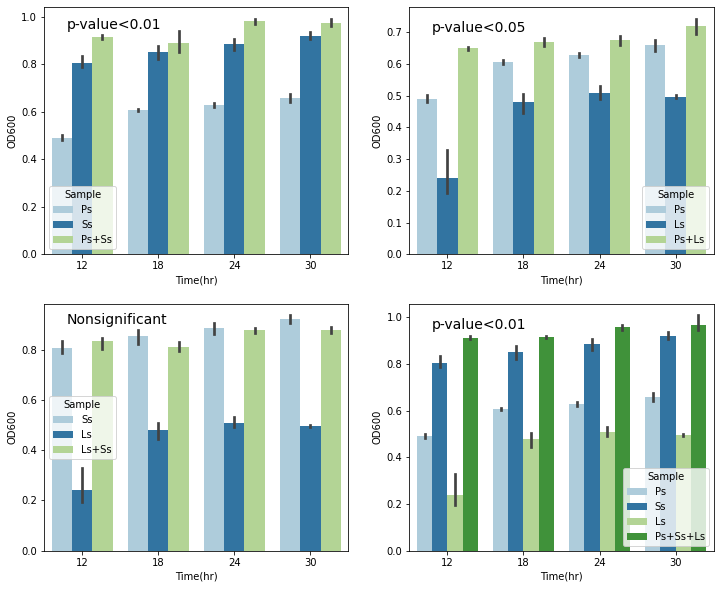

In [6]:
co_samples=['Ps+Ss','Ps+Ls','Ls+Ss','Ps+Ss+Ls']; mono_samples=['Ps','Ss','Ls']
fig, axs = plt.subplots(2,2,figsize=(12,10))
sns.set_palette("Paired")
for i in range(len(co_samples)):
    x,y=int(i/2),int(i%2)
    s=co_samples[i]
    temp_pd=co_data[co_data.Sample.isin([s]+s.split('+'))]
    sns.barplot(data=temp_pd,x='Time(hr)',y='OD600',hue='Sample',ax=axs[x][y])
axs[0][0].text(-0.2,0.95,s='p-value<0.01',fontsize=14)
axs[0][1].text(-0.2,0.7,s='p-value<0.05',fontsize=14)
axs[1][0].text(-0.2,0.9,s='Nonsignificant',fontsize=14)
axs[1][1].text(-0.2,0.95,s='p-value<0.01',fontsize=14)
# plt.savefig('../../../../Oral_paper/Figures_2025/coculture_validation.svg',format='svg',dpi=150)

# 16S of 2-p/3-p co-cultures

In [40]:
s16 = pd.read_csv('../data/culture_data/coculture16sB.csv')
co_samples=['Ps+Ss','Ps+Ls','Ls+Ss','Ps+Ss+Ls']; time_pts=[12,18,24,30]
for col in s16.columns:
    if 'B_' in col:
        new_col = col.replace('B_','').replace('12_','12hr_').replace('18_','18hr_').replace('24_','24hr_')\
                .replace('30_','30hr_').replace('4_','Ps+Ss_').replace('5_','Ps+Ls_')\
                .replace('6_','Ls+Ss_').replace('7_','Ps+Ss+Ls_')
        s16 = s16.rename(columns={col:new_col})
    else:
        continue
sp_col = list(s16.species); s16=s16.drop(['species'],axis=1)
s16 = s16.div(s16.sum(axis=0), axis=1) * 100; s16['species']=sp_col
s16_data = pd.DataFrame(zip(s16['species']),columns=['species'])
for pt in time_pts:
    for sample in co_samples:
        temp_cols=[ str(pt)+'hr_'+sample+'_'+str(i) for i in range(1,4)]
        mean_values = np.mean(s16[temp_cols].values,axis=1)
        std_values = np.std(s16[temp_cols].values,axis=1)
        s16_data[sample+'_'+str(pt)+'_mean']=mean_values
        s16_data[sample+'_'+str(pt)+'_std']=std_values

In [43]:
s16_data

,species,Ps+Ss_12_mean,Ps+Ss_12_std,Ps+Ls_12_mean,Ps+Ls_12_std,Ls+Ss_12_mean,Ls+Ss_12_std,Ps+Ss+Ls_12_mean,Ps+Ss+Ls_12_std,Ps+Ss_18_mean,...,Ps+Ss+Ls_24_mean,Ps+Ss+Ls_24_std,Ps+Ss_30_mean,Ps+Ss_30_std,Ps+Ls_30_mean,Ps+Ls_30_std,Ls+Ss_30_mean,Ls+Ss_30_std,Ps+Ss+Ls_30_mean,Ps+Ss+Ls_30_std
0,Ss,81.928600,2.242503,0.040830,0.057742,86.095436,2.024513,72.240044,2.031372,88.994084,...,82.648042,1.821878,89.820761,0.532858,0.055285,0.049336,82.261799,1.885545,78.339778,1.725236
1,Ls,1.963613,0.258373,25.655291,9.988635,13.904564,2.024513,17.467701,0.922576,2.656271,...,10.822779,0.683774,9.322650,0.729500,93.925545,1.537427,17.738201,1.885545,20.521241,1.694560
2,Ps,16.107787,2.069427,74.303879,10.044597,0.000000,0.000000,10.292255,2.702822,8.349645,...,6.529179,2.126606,0.856589,0.202449,6.019170,1.508864,0.000000,0.000000,1.138981,0.064299


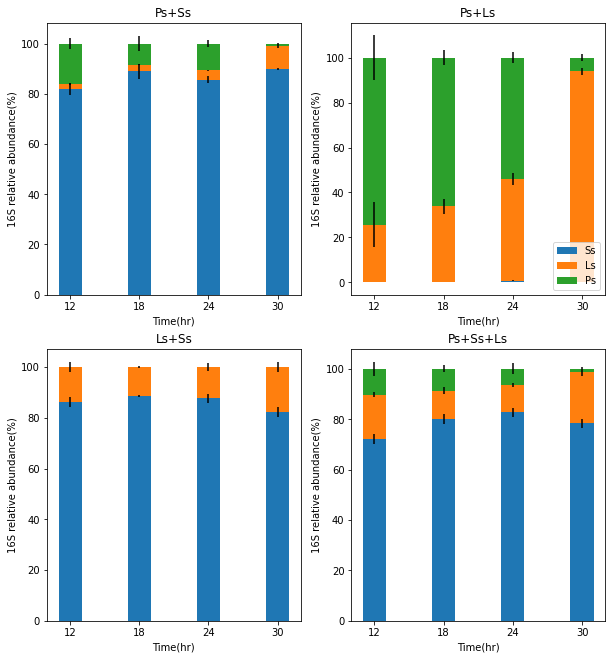

In [58]:
fig, axs = plt.subplots(2,2,figsize=(10,11))
time_pts=[12,18,24,30]
for i in range(len(co_samples)):
    x,y=int(i/2),int(i%2)
    temp_cols=[ co_samples[i]+'_'+str(pt)+'_mean' for pt in time_pts]
    temp_pd = s16_data[temp_cols]
    ss_mean,ls_mean,ps_mean= temp_pd.iloc[0],temp_pd.iloc[1], temp_pd.iloc[2]
    temp_cols=[ co_samples[i]+'_'+str(pt)+'_std' for pt in time_pts]
    temp_pd = s16_data[temp_cols]
    ss_std,ls_std,ps_std= temp_pd.iloc[0],temp_pd.iloc[1], temp_pd.iloc[2]
    axs[x][y].bar(time_pts, ss_mean, 2, yerr=ss_std, label='Ss')
    axs[x][y].bar(time_pts, ls_mean, 2, yerr=ls_std, bottom=ss_mean, label='Ls')
    axs[x][y].bar(time_pts, ps_mean, 2, yerr=ps_std, bottom=ss_mean+ls_mean, label='Ps')
    axs[x][y].set_xticks(time_pts)
    axs[x][y].set_title(co_samples[i])
    axs[x][y].set_xlabel('Time(hr)')
    axs[x][y].set_ylabel('16S relative abundance(%)')
axs[0][1].legend(loc='lower right')

# Growth rate computation